<a href="https://www.kaggle.com/code/funxexcel/p2-sklearn-k-means-elbow-and-silhouette-method?scriptVersionId=110081388" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# How to choose the right cluster number?

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data & Rename Columns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [3]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df_Short = df[['Income','Spending_Score']]
df_Short.head()

,Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Elbow Method to Indetify Clusters

In [6]:
import sklearn.cluster as cluster

## Run Cluster Analysis 12 times

- We run the Cluster Analysis using Cluster as 1 till 12. Also, we store the WSS Scores. The WSS score will be used to create the Elbow Plot
- WSS = Within-Cluster-Sum of Squared

In [7]:
K=range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_Short)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

## We Store the Number of clusters along with their WSS Scores in a DataFrame

In [8]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,1,269981.280000
1,2,181363.595960
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37233.814511
6,7,30241.343618
7,8,25061.304119
8,9,21838.863693
9,10,19811.043286


# Plot Elbow Plot

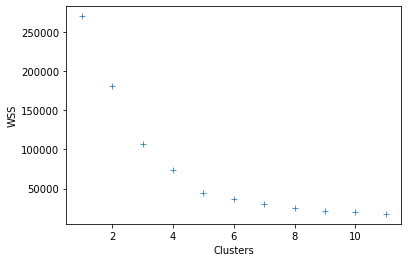

In [9]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="+")
# We get 5 Clusters

## -- 5 Clusters Identified as per Elbow Method

# Silhouette Method to Indentify Clusters

In [10]:
import sklearn.metrics as metrics

In [11]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df_Short).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_Short,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.46761358158775423
Silhouette score for k(clusters) = 4 is 0.4931963109249047
Silhouette score for k(clusters) = 5 is 0.553931997444648
Silhouette score for k(clusters) = 6 is 0.53976103063432
Silhouette score for k(clusters) = 7 is 0.5288104473798049
Silhouette score for k(clusters) = 8 is 0.4572211842776841
Silhouette score for k(clusters) = 9 is 0.45819645551960536
Silhouette score for k(clusters) = 10 is 0.45275118302579015
Silhouette score for k(clusters) = 11 is 0.4506640486267676
Silhouette score for k(clusters) = 12 is 0.43912977729141867


## -- Max Silhouette Score as k = 5, Hence 5 Clusters is the right option

# Perform K-Mean Clustering with 5 Clusters

In [12]:
# We will use 2 Variables for this example
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df[['Spending_Score','Income']])

# Plot Clusters on Chart

In [13]:
df['Clusters'] = kmeans.labels_


In [14]:
kmeans.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

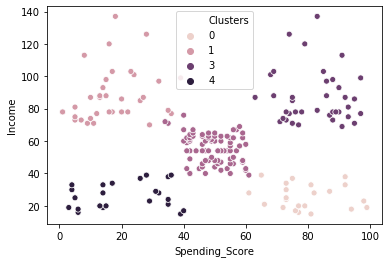

In [15]:
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters',  data=df)

# END